In [21]:
%%capture
%pip install kmodes

%pip install seaborn
%pip install plotly

%pip install yellowbrick

In [22]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


import string

In [23]:
df = pd.read_csv(r"c:\Users\Shiry\OneDrive\Área de Trabalho\Git Hub\projetos\Clusteriza--o-K-Means-e-PCA----Satisfa--o-de-pacientes\IGR.csv", delimiter=";", on_bad_lines="skip")


C:\Users\Shiry\AppData\Local\Temp\ipykernel_13052\690129339.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"c:\Users\Shiry\OneDrive\Área de Trabalho\Git Hub\projetos\Clusteriza--o-K-Means-e-PCA----Satisfa--o-de-pacientes\IGR.csv", delimiter=";", on_bad_lines="skip")


In [24]:
df.head()

,REGISTRO_ANS,RAZAO_SOCIAL,COBERTURA,IGR,QTD_RECLAMACOES,QTD_BENEFICIARIOS,PORTE_OPERADORA,COMPETENCIA,COMPETENCIA_BENEFICIARIO,DT_ATUALIZACAO
0,27,MASSA FALIDA DE SALUTAR SAÚDE SEGURADORA S.A.,assistencia medica,0,0,2,Pequeno,202409,202408,07/10/2024
1,477,SUL AMERICANAA SEGURADORA DE SAUDE S.A,assistencia medica,"131,35",52,39589,Médio,202409,202408,07/10/2024
2,515,ALLIANZ SAÚDE S/A,assistencia medica,0,0,337,Pequeno,202409,202408,07/10/2024
3,582,PORTO SEGURO - SEGURO SAÚDE S/A,assistencia medica,"49,93",303,606829,Grande,202409,202408,07/10/2024
4,582,PORTO SEGURO - SEGURO SAÚDE S/A,Exclusivamente odontológica,"1,59",15,942240,Grande,202409,202408,07/10/2024


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132559 entries, 0 to 132558
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   REGISTRO_ANS              132559 non-null  int64 
 1   RAZAO_SOCIAL              132559 non-null  object
 2   COBERTURA                 132559 non-null  object
 3   IGR                       132559 non-null  object
 4   QTD_RECLAMACOES           132559 non-null  int64 
 5   QTD_BENEFICIARIOS         132559 non-null  int64 
 6   PORTE_OPERADORA           132559 non-null  object
 7   COMPETENCIA               132559 non-null  int64 
 8   COMPETENCIA_BENEFICIARIO  132559 non-null  int64 
 9   DT_ATUALIZACAO            70440 non-null   object
dtypes: int64(5), object(5)
memory usage: 10.1+ MB


In [26]:
df['IGR'] =df['IGR'].str.replace(',','.').astype(float)

In [27]:
df_2 = df.copy()

In [28]:
df.head()

,REGISTRO_ANS,RAZAO_SOCIAL,COBERTURA,IGR,QTD_RECLAMACOES,QTD_BENEFICIARIOS,PORTE_OPERADORA,COMPETENCIA,COMPETENCIA_BENEFICIARIO,DT_ATUALIZACAO
0,27,MASSA FALIDA DE SALUTAR SAÚDE SEGURADORA S.A.,assistencia medica,0.00,0,2,Pequeno,202409,202408,07/10/2024
1,477,SUL AMERICANAA SEGURADORA DE SAUDE S.A,assistencia medica,131.35,52,39589,Médio,202409,202408,07/10/2024
2,515,ALLIANZ SAÚDE S/A,assistencia medica,0.00,0,337,Pequeno,202409,202408,07/10/2024
3,582,PORTO SEGURO - SEGURO SAÚDE S/A,assistencia medica,49.93,303,606829,Grande,202409,202408,07/10/2024
4,582,PORTO SEGURO - SEGURO SAÚDE S/A,Exclusivamente odontológica,1.59,15,942240,Grande,202409,202408,07/10/2024


In [29]:
colunas_drop =['COBERTURA','DT_ATUALIZACAO','PORTE_OPERADORA', 'RAZAO_SOCIAL','COMPETENCIA','COMPETENCIA_BENEFICIARIO','REGISTRO_ANS','IGR']

for col in colunas_drop:
    df=df.drop(columns=[col])

In [30]:
df.describe()

,QTD_RECLAMACOES,QTD_BENEFICIARIOS
count,132559.000000,1.325590e+05
mean,12.182824,6.525260e+04
std,110.346518,3.099818e+05
min,0.000000,1.000000e+00
25%,0.000000,2.770000e+03
50%,0.000000,1.066500e+04
75%,2.000000,3.457100e+04
max,5132.000000,7.977292e+06


In [31]:
df.head()

,QTD_RECLAMACOES,QTD_BENEFICIARIOS
0,0,2
1,52,39589
2,0,337
3,303,606829
4,15,942240


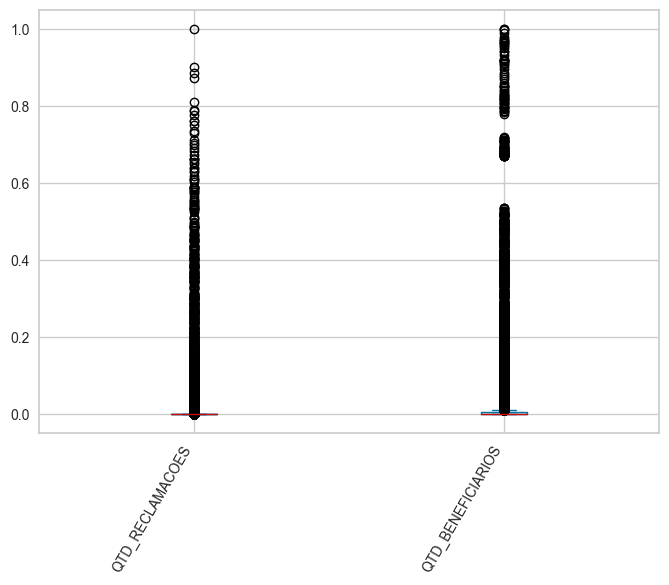

In [32]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Supondo que 'df' seja o seu DataFrame
scaler = MinMaxScaler()

# Converta o DataFrame para um array numpy
df_scaled = scaler.fit_transform(df.values)

# Se você quiser manter o DataFrame com os mesmos nomes de colunas
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Agora você pode continuar com a visualização
df_scaled.plot.box()
plt.xticks(rotation=60, ha='right')
plt.show()


In [33]:
df_scaled.describe()

,QTD_RECLAMACOES,QTD_BENEFICIARIOS
count,132559.000000,132559.000000
mean,0.002374,0.008180
std,0.021502,0.038858
min,0.000000,0.000000
25%,0.000000,0.000347
50%,0.000000,0.001337
75%,0.000390,0.004334
max,1.000000,1.000000


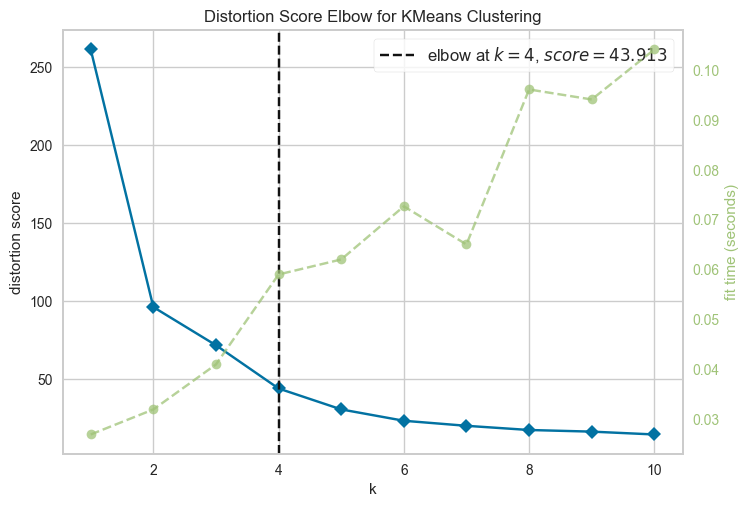

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:

# Assuming df_scaled is your scaled DataFrame
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(df_scaled)  # Fit the visualizer to the data
visualizer.show()           # Show the elbow plot


In [35]:
modelo = KMeans(6,random_state=0).fit(df_scaled)

In [36]:
centroids = modelo.cluster_centers_
labels = modelo.labels_

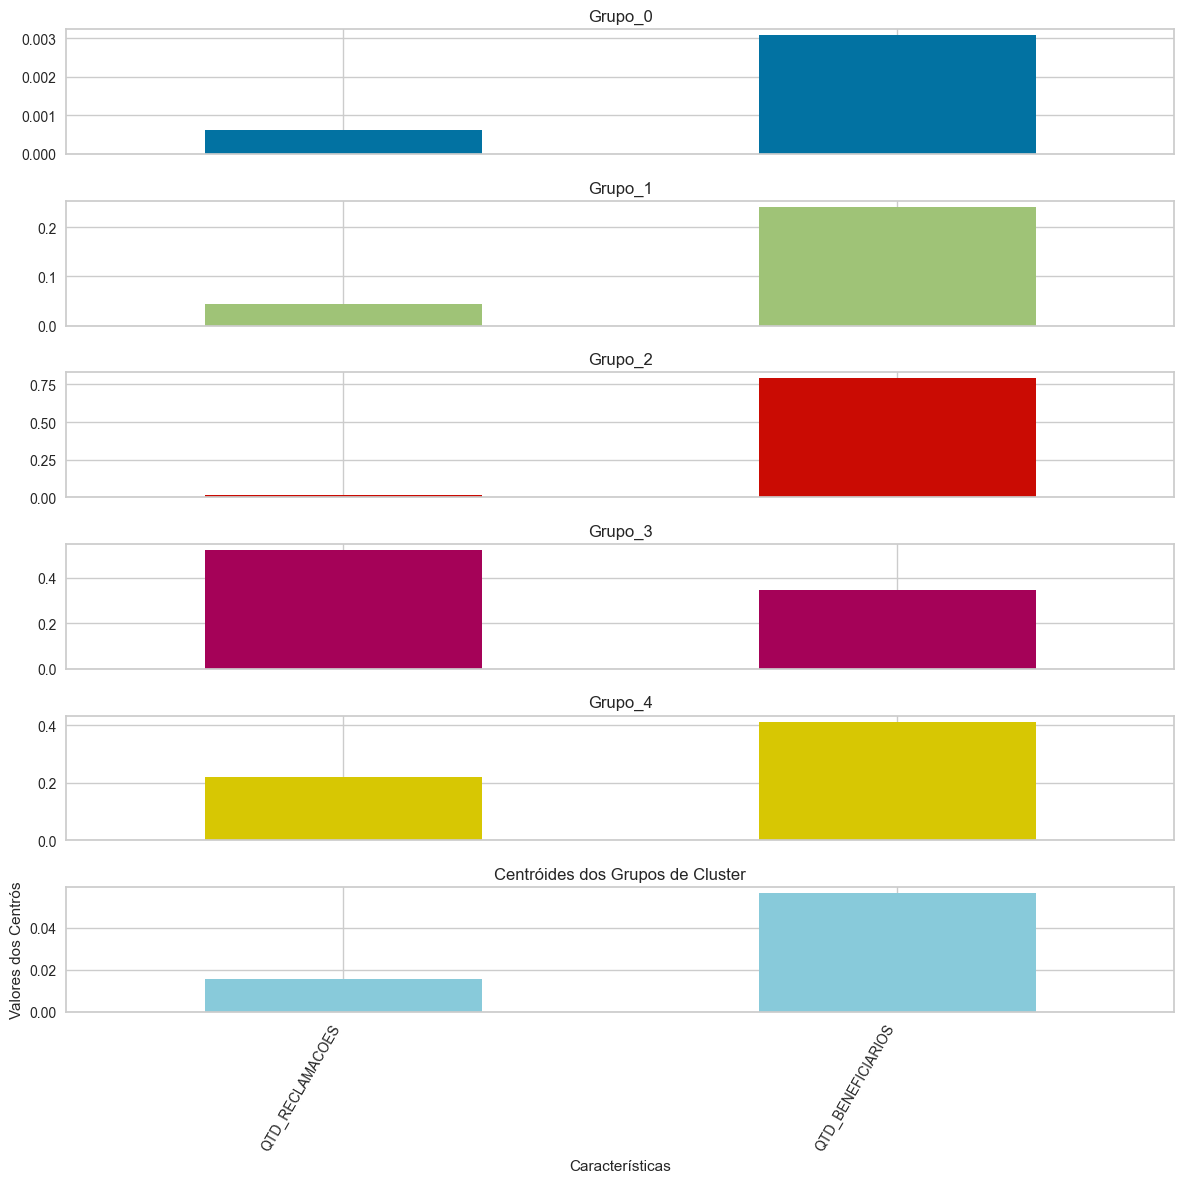

In [37]:
(
  pd.DataFrame(centroids, columns=df_scaled.columns).T.add_prefix('Grupo_')
  .plot.bar(subplots=True, figsize=(12,12), legend=False)
)
plt.title('Centróides dos Grupos de Cluster')
plt.ylabel('Valores dos Centrós')
plt.xlabel('Características')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()


plt.show()

c:\Users\Shiry\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


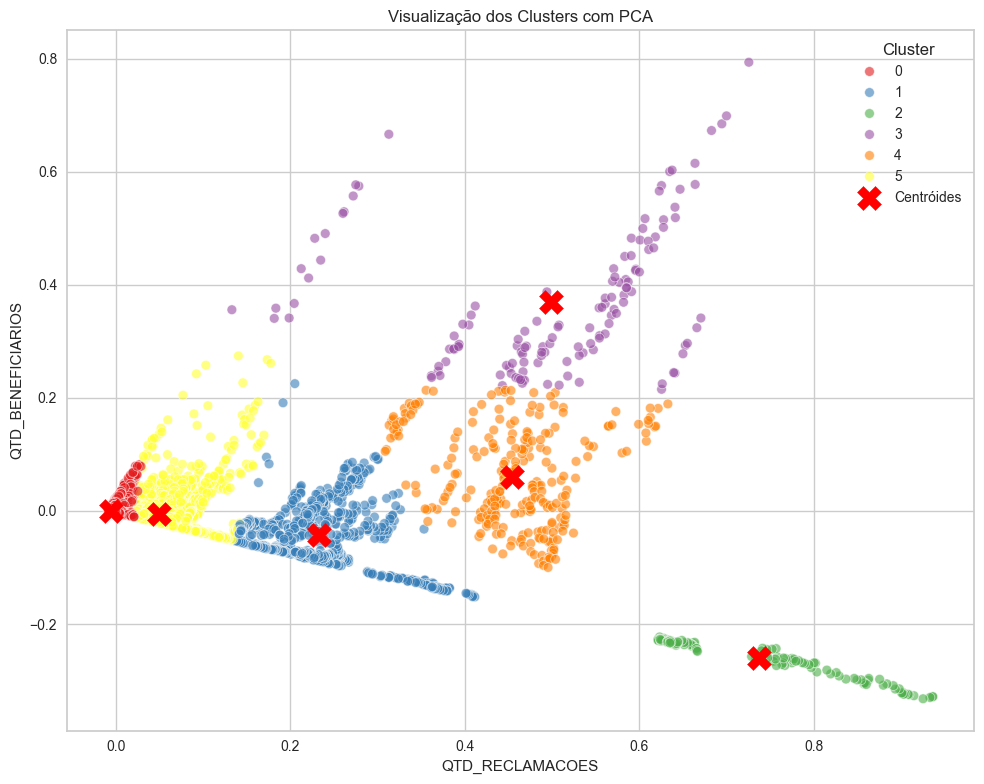

In [38]:
# Redução de dimensionalidade
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)


# Criar um DataFrame com as componentes principais e os rótulos dos clusters
df_pca = pd.DataFrame(data=df_pca, columns=['QTD_RECLAMACOES', 'QTD_BENEFICIARIOS'])
df_pca['Cluster'] = labels  


centroids = modelo.cluster_centers_
centroids_pca = pca.transform(centroids)  
centroids_df = pd.DataFrame(centroids_pca, columns=['QTD_RECLAMACOES', 'QTD_BENEFICIARIOS'])
centroids_df['Cluster'] = range(len(centroids_df))  

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='QTD_RECLAMACOES', y='QTD_BENEFICIARIOS', palette='Set1', hue='Cluster', alpha=0.6)


# Plotar os centróides


plt.scatter(centroids_df['QTD_RECLAMACOES'], centroids_df['QTD_BENEFICIARIOS'], 
 s=300, c='red', marker='X', label='Centróides')

plt.title('Visualização dos Clusters com PCA')
plt.xlabel('QTD_RECLAMACOES')
plt.ylabel('QTD_BENEFICIARIOS')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()



In [39]:
df.assign(cluster=labels).groupby('cluster').agg(['mean','min','max','median'])

QTD_RECLAMACOES                     QTD_BENEFICIARIOS           \
                   mean   min   max  median              mean      min   
cluster                                                                  
0              3.185756     0   454     0.0      2.455593e+04        1   
1            226.034571     0  1464   136.0      1.927104e+06   962347   
2             88.358974    21   207    84.0      6.304152e+06  5342228   
3           2682.125000  1799  5132  2495.0      2.755093e+06    63740   
4           1122.037879   425  2062  1081.0      3.290307e+06  1975746   
5             79.569177     0  1611    37.0      4.493799e+05    16684   

                             
             max     median  
cluster                      
0         255191     9783.0  
1        3564709  1847033.0  
2        7977292  6324693.0  
3        4167622  3127234.0  
4        4266265  3301115.0  
5        1223372   386918.0

In [46]:
df_2.columns

Index(['REGISTRO_ANS', 'RAZAO_SOCIAL', 'COBERTURA', 'IGR', 'QTD_RECLAMACOES',
       'QTD_BENEFICIARIOS', 'PORTE_OPERADORA', 'COMPETENCIA',
       'COMPETENCIA_BENEFICIARIO', 'DT_ATUALIZACAO', 'Cluster'],
      dtype='object')

In [43]:
# Adicionar rótulos de cluster ao DataFrame original
df_2['Cluster'] = labels  # Onde labels é a saída do modelo K-Means

# Verificar as operadoras em cada cluster
operadoras_clusters = df_2[['RAZAO_SOCIAL', 'Cluster']]
print(operadoras_clusters.head(30))


                                         RAZAO_SOCIAL  Cluster
0       MASSA FALIDA DE SALUTAR SAÚDE SEGURADORA S.A.        0
1              SUL AMERICANAA SEGURADORA DE SAUDE S.A        0
2                                   ALLIANZ SAÚDE S/A        0
3                     PORTO SEGURO - SEGURO SAÚDE S/A        5
4                     PORTO SEGURO - SEGURO SAÚDE S/A        5
5                            UNIMED SEGUROS SAÚDE S/A        5
6                                   ITAUSEG SAUDE S.A        0
7                                 BRADESCO SAÚDE S.A.        3
8               SUL AMERICA COMPANHIA DE SEGURO SAÚDE        3
9               SUL AMERICA COMPANHIA DE SEGURO SAÚDE        1
10  UNIMED LITORAL SUL/RS - COOPERATIVA DE ASSISTÊ...        0
11         UNIODONTO MACAÉ - COOPERATIVA ODONTOLÓGICA        0
12     UNIMED DE ASSIS COOPERATIVA DE TRABALHO MÉDICO        0
13         DENTAL GOLD ASSISTÊNCIA ODONTOLÓGICA LTDA.        0
14  UNIMED DO BRASIL - CONF. NACIONAL DAS COOPERAT...  

In [48]:
df_2.head(30)

,REGISTRO_ANS,RAZAO_SOCIAL,COBERTURA,IGR,QTD_RECLAMACOES,QTD_BENEFICIARIOS,PORTE_OPERADORA,COMPETENCIA,COMPETENCIA_BENEFICIARIO,DT_ATUALIZACAO,Cluster
0,27,MASSA FALIDA DE SALUTAR SAÚDE SEGURADORA S.A.,assistencia medica,0.00,0,2,Pequeno,202409,202408,07/10/2024,0
1,477,SUL AMERICANAA SEGURADORA DE SAUDE S.A,assistencia medica,131.35,52,39589,Médio,202409,202408,07/10/2024,0
2,515,ALLIANZ SAÚDE S/A,assistencia medica,0.00,0,337,Pequeno,202409,202408,07/10/2024,0
3,582,PORTO SEGURO - SEGURO SAÚDE S/A,assistencia medica,49.93,303,606829,Grande,202409,202408,07/10/2024,5
4,582,PORTO SEGURO - SEGURO SAÚDE S/A,Exclusivamente odontológica,1.59,15,942240,Grande,202409,202408,07/10/2024,5
5,701,UNIMED SEGUROS SAÚDE S/A,assistencia medica,57.40,476,829322,Grande,202409,202408,07/10/2024,5
6,884,ITAUSEG SAUDE S.A,assistencia medica,67.53,5,7404,Pequeno,202409,202408,07/10/2024,0
7,5711,BRADESCO SAÚDE S.A.,assistencia medica,99.10,3099,3127234,Grande,202409,202408,07/10/2024,3
8,6246,SUL AMERICA COMPANHIA DE SEGURO SAÚDE,assistencia medica,97.49,2124,2178663,Grande,202409,202408,07/10/2024,3
9,6246,SUL AMERICA COMPANHIA DE SEGURO SAÚDE,Exclusivamente odontológica,3.08,54,1754799,Grande,202409,202408,07/10/2024,1
